# 1. Discrete Fourier Transform Algorithm

$$F(\nu) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} e^{-i2\pi\nu t} f(t) dt$$

Draw $N$ equidistant samples (distance $\Delta t$, $T = N \Delta t$) at times $t_k=t_0 + k\Delta t$. 
Hence $\nu_n = n \Delta \nu = \frac{n}{T}$

If we set $t_0=0$, then

$$Y_n = \sum_{k=0}^{N-1} e^{-i2\pi \frac{nk}{N}} y_k$$

where $n = 0,1,...,N-1$

and the back transfrom is given by

$$y_k = \frac{1}{N}\sum_{n=0}^{N-1} e^{i2\pi \frac{nk}{N}} Y_n$$

where $k = 0,1,...,N-1$


# Not covered in the lecture: Discrete Time Fourier Transform:

$$F(\nu_n = n\Delta \nu) = \Delta t \left(\sum_{k=0}^{N-1}f(t_0 + k \Delta t) e^{-i2\pi \frac{lk}{N}} + f(t_0 +T)\right)e^{-i2\pi n \Delta \nu t_0} = \Delta t \left( DFT_{correctly\;ordered}(y[:-1] + f(t_0 +T)) \right)e^{-i2\pi l \Delta \nu t_0}$$

Where $l = -N/2 ... +N/2$ and $f(t_0 + T) \approx f(t_0)$

But we can use the property that $DFT(l+N) =DFT(l)$:

Example, N = 6

n:  0, 1, 2, 3, 4, 5  
l: -3,-2,-1, 0, 1, 2

--> same values for aranging using that l = n-6

n:  3, 4, 5  
l:  -3,-2,-1  

n:  0, 1, 2  
l:  0, 1, 2

$$\rightarrow DFT_{correctly\;ordered} = DFT[N/2:N:-1] + DFT[0:N/2]$$

# Joachim.H.Rosenberger@tum.de

In [88]:
%matplotlib qt5
import matplotlib.pyplot as plt
import numpy as np

def DFT(y,N): 
    
    """
    y_k = y(t0 + k dt) k ele {0,N-1}, hence len(y) = N-1
    """
    
    if(len(y) != N):
        raise ValueError('len(y) != N-1 len(y) ='+str(len(y)) + ' N=' +str(N))
    
    Z = np.exp(-2j*np.pi/N)

    #result is a complex number
    Y = np.zeros(t.shape[0], dtype=np.complex64)
    
    for n in range(N):
        for k in range(N):
            Y[n] += y[k] * Z**(n*k)

    return Y

def DFTback(Y, N):

    if(len(Y) != N):
        raise ValueError('len(Y) != N-1 len(y) ='+str(len(Y)) + ' N=' +str(N))
    
    Z = np.exp(-2j*np.pi/N)

    #result is a real number
    y = np.zeros_like(t)

    for n in range(N):
        y_n = 0+0j
        for k in range(N):
            y_n += Y[k] * Z**(-n*k)/N
        y[n] = y_n.real

    return y

def generate_samples_DFT(f,T_min,T_max,frequency,sampling_frequency):
    
    """
    f is a function that accepts as
    - 1. argument time
    - 2. argument frequency
    """
    
    #f_sampling = 100 * frequency function
    dt_sampling = 1/sampling_frequency
    t = np.arange(T_min,T_max,dt_sampling)
    y = f(t,frequency)
    N=len(y)
        
    return [t,y,N]

def plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t_back,y_back,name='',fig_show = True, fig = '', back_tranformed = True):

    num_subplots = 5
    
    if(fig == ''):
        fig = plt.figure()
        fig.set_tight_layout(True)
    
    ax = fig.add_subplot(num_subplots,1,1)
    ax.title.set_text('Signal')

    if(back_tranformed):
        ax.plot(t,y,label = name + ' original')
        ax.plot(t,y,label = name + ' back transform')
    else:
        ax.plot(t,y,label = name)
        
    ax.set_xlabel('time in s')
    ax.legend()
    
    ax = fig.add_subplot(num_subplots,1,2)
    ax.title.set_text('Real Part DFT')
    ax.plot(nu,y_dft.real, label = name)
    ax.set_xlabel('frequency in Hz')
    ax.legend()

    ax = fig.add_subplot(num_subplots,1,3)
    ax.title.set_text('Imaginary Part DFT')
    ax.plot(nu,y_dft.imag, label = name)
    ax.set_xlabel('frequency in Hz')
    ax.legend()
    
    ax = fig.add_subplot(num_subplots,1,4)
    ax.title.set_text('Absolute**2 DFT')
    ax.plot(nu,abs(y_dft)**2, label = name)
    ax.set_xlabel('frequency in Hz')
    
    ax.legend()    
    
    fig.show()

    return fig
    
def plot_function_and_DFT_and_back_transformed_for_list_argument(list_of_parameter_list):
    
    fig = ''
    for ele in list_of_parameter_list:
        fig = plot_function_and_DFT_and_back_transformed(*ele,fig_show = False, fig=fig, back_tranformed=False)
    

## 1. Transfrom sinus, checking that everything works as expected

In [45]:
def sin(t,frequency):
    return np.sin(2*np.pi*t*frequency)

f = sin
T_min = 0
T_max = 1
frequency = 10
sampling_frequency = 1000
T = T_max-T_min

[t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
nu = np.arange(0,N)*(1/T)

y_dft = DFT(y,N) 
y_back = DFTback(y_dft, N)
plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t,y_back,'sinus')

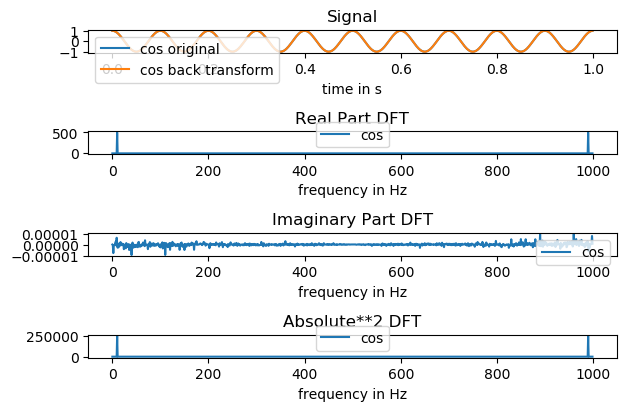

In [47]:
def cos(t,frequency):
    return np.cos(2*np.pi*t*frequency)

f = cos
T_min = 0
T_max = 1
frequency = 10
sampling_frequency = 1000
T = T_max-T_min

[t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
nu = np.arange(0,N)*(1/T)

y_dft = DFT(y,N) 
y_back = DFTback(y_dft, N)
plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t,y_back,'cos')

## 1. a) Transfrom the sawtooth function

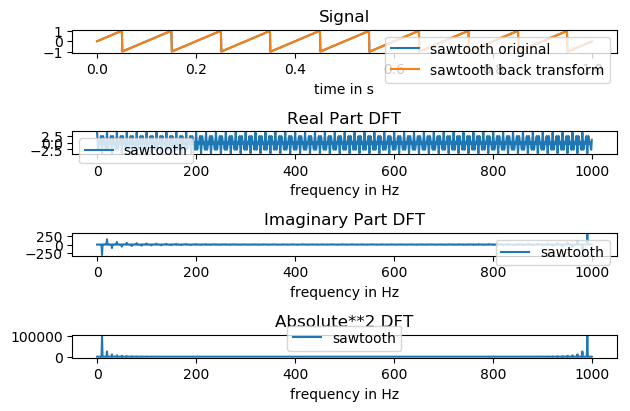

In [48]:
def saw_tooth(t,frequency,Amplitude=1):
    
    T = (1/frequency)
    t = (t%T)
    y = (2*Amplitude/T)*t
    
    if(t <= T/2):
        return y
    else:
        return y-2*Amplitude
    
saw_tooth = np.vectorize(saw_tooth)

f = saw_tooth
[t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
nu = np.arange(0,N)*(1/T)

y_dft = DFT(y,N) 
y_back = DFTback(y_dft, N)
plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t,y_back,'sawtooth')

## 1b) Transform sin and cos function

In [52]:
def fun1(t,frequency=1):
    return np.sin(2*np.pi*t*frequency)

def fun2(t,frequency):
    return np.cos(2*np.pi*t*frequency)

def fun3(t,frequency):
    return 3 + np.cos(2*np.pi*t*frequency)

def fun4(t,frequency):
    return 3 + np.cos(2*np.pi*t*frequency+5)
    
dict_function = {'sin(2*pi*t)' : fun1, 'cos(2*pi*t)' : fun2, '3+cos(2*pi*t)' : fun3, '3+cos(2*pi*t+5)' : fun4}

T_min = 0
T_max = 1
frequency = 1
sampling_frequency = 100
T = T_max-T_min
nu = np.arange(0,N)*(1/T)

list_of_parameter_list = []

for key, f in dict_function.items():
    
    [t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
    
    y_dft = DFT(y,N) 
    y_back = DFTback(y_dft, N)
    
    list_of_parameter_list.append([t,y,nu,y_dft,t,y_back,key])
    

In [53]:
plot_function_and_DFT_and_back_transformed_for_list_argument(list_of_parameter_list[2:])

/custom/programs/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## 1c) Transfrom $y(t)=exp(-\frac{t}{2\pi})$ 

In [57]:
def fun(t,frequency):
    return np.exp(-t/(2*np.pi))

f = fun
T_min = 0
T_max = 7*np.pi #exp(-7) ~ 0.001
frequency = 0.1
sampling_frequency = 10
T=T_max-T_min

[t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
nu = np.arange(0,N)*(1/T)

y_dft = DFT(y,N) 
y_back = DFTback(y_dft, N)

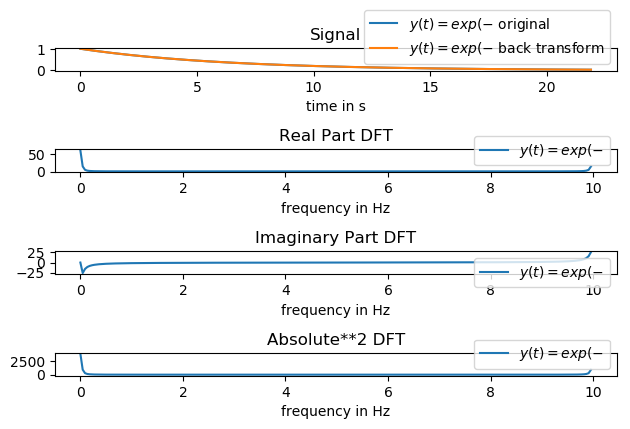

In [59]:
plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t,y_back,'$y(t)=exp(-\frac{t}{2\pi})$')

## ...but actually lets transform the normal distribution $f(x)=\frac{1}{\sqrt{2\pi}}\exp^{-\frac{t^2}{2}}$

it is a fixed point of the Fourier transform, hence $F(\nu)=(\mathcal{F}f)(\nu)=f(\nu)$

In [62]:
def norm_dist(t,frequency = 0):
    return (1/np.sqrt(2*np.pi))*np.exp(-np.power(t,2)/2)

t = np.arange(-10,10,0.1)
plt.plot(t,norm_dist(t))

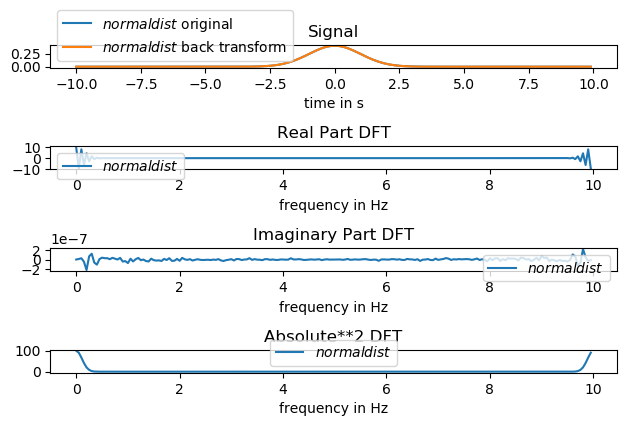

In [64]:
f = norm_dist
T_min = -10
T_max = 10
frequency = 0.1
sampling_frequency = 10
T = T_max - T_min

[t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
nu = np.arange(0,N)*(1/T)

y_dft = DFT(y,N) 
y_back = DFTback(y_dft, N)

plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft,t,y_back,'$normal dist$')

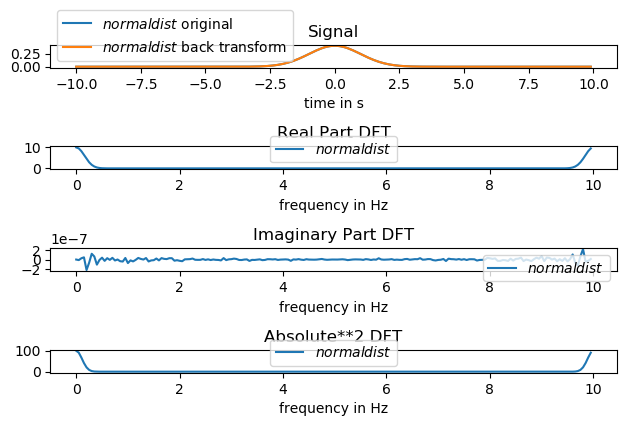

In [66]:
y_dft_shifted = y_dft*np.exp(1.0j*2*np.pi*T_min*np.arange(nu.size)/((T_max-T_min))).real
plot_function_and_DFT_and_back_transformed(t,y,nu,y_dft_shifted,t,y_back,'$normal dist$')

## 1d) Compare magnitude of imaginary and real part of Fourie Transformed of an even and odd function

In [75]:
def odd(t,frequency=1):
    return np.sin(2*np.pi*t*frequency)

def even(t,frequency):
    return np.cos(2*np.pi*t*frequency)

dict_function = {'odd' : odd, 'even' : even}
T_min = 0
T_max = 1
frequency = 1
sampling_frequency = 200
T=T_max-T_min

list_of_parameter_list = []

for key, f in dict_function.items():
    [t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
    nu = np.arange(0,N)*(1/T)

    y_dft = DFT(y,N) 
    y_back = DFTback(y_dft, N)
    list_of_parameter_list.append([t,y,nu,y_dft,t,y_back,key])
    
plot_function_and_DFT_and_back_transformed_for_list_argument(list_of_parameter_list)

## 1d) FFT

In [115]:
import sys 

def FFT(y):
    
    N = len(y)
    
    if abs(np.log2(N) - int(np.log2(N))) > 1e-14:
        print("N must be 2**n")
        sys.exit(1)
        
    Y = FFT_rec(y)
    
    return Y

def FFT_rec(y):
    
    N = len(y)

    if N == 1:
        return y
    
    ft_even = FFT_rec(y[::2])
    ft_odd  = FFT_rec(y[1::2])

    n = int(N/2)
    
    W = np.exp(- 1.0j*np.pi/n*np.arange(n))
    Y = np.zeros(N, dtype=np.complex64)

    Y[:n] = ft_even + W*ft_odd
    Y[n:] = ft_even - W*ft_odd
    
    return Y

In [136]:
import time

def sin(t,frequency=1):
    return np.sin(2*np.pi*t*frequency)


T_min = 0
T_max = 1
frequency = 10
sampling_frequency = 512
T=T_max-T_min

list_of_parameter_list = [0,1]

In [137]:
dict_function = {'DFT sin' : sin}

for key, f in dict_function.items():
    
    [t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
    nu = np.arange(0,N)*(1/T)

    t1 = time.clock()
    y_dft = DFT(y,N) 
    t2 = time.clock()
    duration_dft = t2-t1
        
    y_back = DFTback(y_dft, N)
    list_of_parameter_list[0] = [t,y,nu,y_dft,t,y_back,key]
    
    
plot_function_and_DFT_and_back_transformed_for_list_argument([list_of_parameter_list[0]])

In [139]:
dict_function = {'FFT sin' : sin}
for key, f in dict_function.items():
    
    [t,y,N] = generate_samples_DFT(f,T_min, T_max,frequency, sampling_frequency)
    nu = np.arange(0,N)*(1/T)

    print(t.size)
#    n = t.size
#    n_potence = 2**int(np.log2(n))
#    t = t[:n_potence]
#    y = y[:n_potence]
        
    t1 = time.clock()
    y_dft = FFT(y)    
    t2 = time.clock()
    duration_fft = t2-t1

    y_back = DFTback(y_dft, N)
    list_of_parameter_list[1] = [t,y,nu,y_dft,t,y_back,key]
    
plot_function_and_DFT_and_back_transformed_for_list_argument(list_of_parameter_list)

print('duration dft',duration_dft)
print('duration fft',duration_fft)
print('ratio',duration_dft/duration_fft)

512
duration dft 1.3033159999999953
duration fft 0.0130929999999978
ratio 99.54296188804813
